In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
import keras.layers as layers
from tensorflow.keras.layers import Dense

In [ ]:
#Train Dataset
dataSet = pd.read_csv("/content/600 news with valid hoax label.csv", sep=';', encoding='cp1252')
#Test Dataset
# dataSet = pd.read_csv("/content/250 news with valid hoax label.csv", sep=';', encoding='cp1252')

In [ ]:
dataSet.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


In [ ]:
!pip install fasttext contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 20.1 MB/s eta 0:00:00
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=3133878 sha256=9dd4dcadb5ffc0876bc6ba50d946439d6491b0fc81078c5f1cf0c0f404a49306
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [ ]:
import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
dataSet['tokenized'] = dataSet['berita'].apply(word_tokenize)
dataSet.head()

,berita,tagging,tokenized
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,"[Jakarta, ,, Di, jejaring, sosial, ,, banyak, ..."
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,"[Isu, bahwa, ikan, lele, mengandung, sel, kank..."
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,"[Bagi, penikmat, kuliner, dengan, bahan, dasar..."
3,Ikan lele merupakan salah satu makanan favorit...,Valid,"[Ikan, lele, merupakan, salah, satu, makanan, ..."
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,"[Ikan, lele, merupakan, bahan, makanan, yang, ..."


In [ ]:
dataSet['lower'] = dataSet['tokenized'].apply(lambda x: [word.lower() for word in x])
dataSet.head()

,berita,tagging,tokenized,lower
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,"[Jakarta, ,, Di, jejaring, sosial, ,, banyak, ...","[jakarta, ,, di, jejaring, sosial, ,, banyak, ..."
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,"[Isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank..."
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,"[Bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar..."
3,Ikan lele merupakan salah satu makanan favorit...,Valid,"[Ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ..."
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,"[Ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ..."


In [ ]:
punc = string.punctuation
dataSet['no_punc'] = dataSet['lower'].apply(lambda x: [word for word in x if word not in punc])
dataSet.head()

,berita,tagging,tokenized,lower,no_punc
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,"[Jakarta, ,, Di, jejaring, sosial, ,, banyak, ...","[jakarta, ,, di, jejaring, sosial, ,, banyak, ...","[jakarta, di, jejaring, sosial, banyak, bereda..."
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,"[Isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank..."
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,"[Bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar..."
3,Ikan lele merupakan salah satu makanan favorit...,Valid,"[Ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ..."
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,"[Ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ..."


In [ ]:
dataSet.shape[0]

600

In [ ]:
x = 0
for i in range(dataSet.shape[0]):
  x += len(dataSet['no_punc'][i])
print(x/dataSet.shape[0])

314.14666666666665


In [ ]:
stop_words = set(stopwords.words('indonesian'))
dataSet['stopwords_removed'] = dataSet['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
dataSet.head()

,berita,tagging,tokenized,lower,no_punc,stopwords_removed
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,"[Jakarta, ,, Di, jejaring, sosial, ,, banyak, ...","[jakarta, ,, di, jejaring, sosial, ,, banyak, ...","[jakarta, di, jejaring, sosial, banyak, bereda...","[jakarta, jejaring, sosial, beredar, informasi..."
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,"[Isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, ikan, lele, mengandung, sel, kanker, jej..."
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,"[Bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar...","[penikmat, kuliner, bahan, dasar, ikan, lele, ..."
3,Ikan lele merupakan salah satu makanan favorit...,Valid,"[Ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, salah, makanan, favorit, indonesi..."
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,"[Ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, bahan, makanan, populer, indonesi..."


In [ ]:
x = 0
for i in range(dataSet.shape[0]):
  x += len(dataSet['stopwords_removed'][i])
print(x/dataSet.shape[0])

182.35166666666666


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 13.2 MB/s eta 0:00:00


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


# stem
# output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

# dataSet['lower'] = dataSet['tokenized'].apply(lambda x: [word.lower() for word in x])

dataSet['stemmed'] = dataSet['stopwords_removed'].apply(lambda x: [stemmer.stem(word) for word in x])
dataSet.head()


,berita,tagging,tokenized,lower,no_punc,stopwords_removed,stemmed
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,"[Jakarta, ,, Di, jejaring, sosial, ,, banyak, ...","[jakarta, ,, di, jejaring, sosial, ,, banyak, ...","[jakarta, di, jejaring, sosial, banyak, bereda...","[jakarta, jejaring, sosial, beredar, informasi...","[jakarta, jejaring, sosial, edar, informasi, s..."
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,"[Isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, ikan, lele, mengandung, sel, kanker, jej...","[isu, ikan, lele, kandung, sel, kanker, jejari..."
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,"[Bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar...","[penikmat, kuliner, bahan, dasar, ikan, lele, ...","[nikmat, kuliner, bahan, dasar, ikan, lele, be..."
3,Ikan lele merupakan salah satu makanan favorit...,Valid,"[Ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, salah, makanan, favorit, indonesi...","[ikan, lele, salah, makan, favorit, indonesia,..."
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,"[Ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, bahan, makanan, populer, indonesi...","[ikan, lele, bahan, makan, populer, indonesia,..."


In [ ]:
dataSet['stem_str'] = [' '.join(map(str,l)) for l in dataSet['stemmed']]
dataSet.head()

,berita,tagging,tokenized,lower,no_punc,stopwords_removed,stemmed,stem_str
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid,"[Jakarta, ,, Di, jejaring, sosial, ,, banyak, ...","[jakarta, ,, di, jejaring, sosial, ,, banyak, ...","[jakarta, di, jejaring, sosial, banyak, bereda...","[jakarta, jejaring, sosial, beredar, informasi...","[jakarta, jejaring, sosial, edar, informasi, s...",jakarta jejaring sosial edar informasi sebut l...
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid,"[Isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, bahwa, ikan, lele, mengandung, sel, kank...","[isu, ikan, lele, mengandung, sel, kanker, jej...","[isu, ikan, lele, kandung, sel, kanker, jejari...",isu ikan lele kandung sel kanker jejaring soci...
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid,"[Bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar...","[bagi, penikmat, kuliner, dengan, bahan, dasar...","[penikmat, kuliner, bahan, dasar, ikan, lele, ...","[nikmat, kuliner, bahan, dasar, ikan, lele, be...",nikmat kuliner bahan dasar ikan lele berita su...
3,Ikan lele merupakan salah satu makanan favorit...,Valid,"[Ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, merupakan, salah, satu, makanan, ...","[ikan, lele, salah, makanan, favorit, indonesi...","[ikan, lele, salah, makan, favorit, indonesia,...",ikan lele salah makan favorit indonesia harga ...
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid,"[Ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, merupakan, bahan, makanan, yang, ...","[ikan, lele, bahan, makanan, populer, indonesi...","[ikan, lele, bahan, makan, populer, indonesia,...",ikan lele bahan makan populer indonesia sebar ...


In [ ]:
dataSet.shape

(600, 8)

In [ ]:
# Training
dataSet.to_csv('preprocessed2.csv',index = False)
from google.colab import files
files.download("preprocessed2.csv")

# Testing
# dataSet.to_csv('preprocessedtest.csv',index = False)
# from google.colab import files
# files.download("preprocessedtest.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Exploratory Data Analysis (for Train dataset)

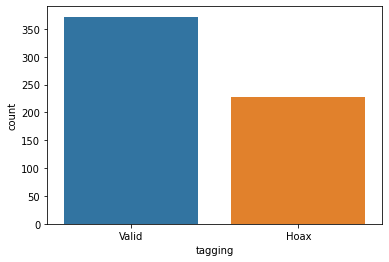

In [ ]:
sns.countplot(x=dataSet["tagging"])

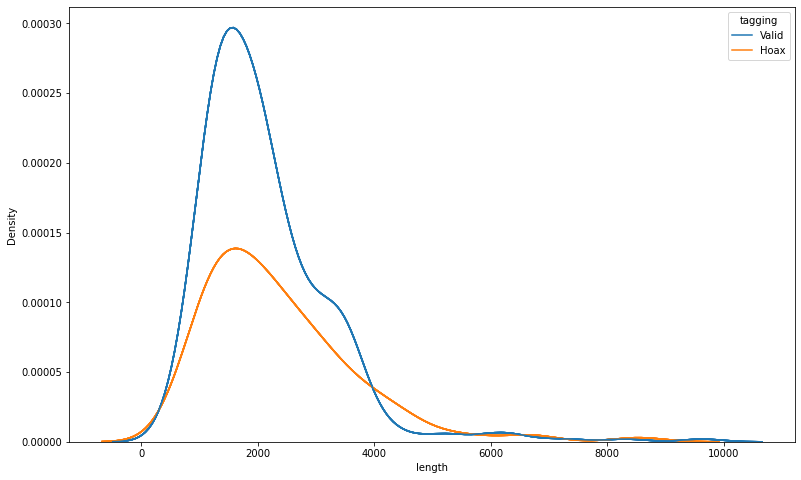

In [ ]:
plt.figure(figsize = (13,8))
for i, df in enumerate(dataSet):
    dataSet2 = dataSet.copy()
    dataSet2['length'] = [len(x) for x in dataSet2['berita']]
    sns.kdeplot(data=dataSet2,x='length',hue='tagging')
plt.show()

In [ ]:
from wordcloud import WordCloud

def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(str(df)+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    plt.axis("off");

In [ ]:
emo_list = dataSet.tagging.unique()

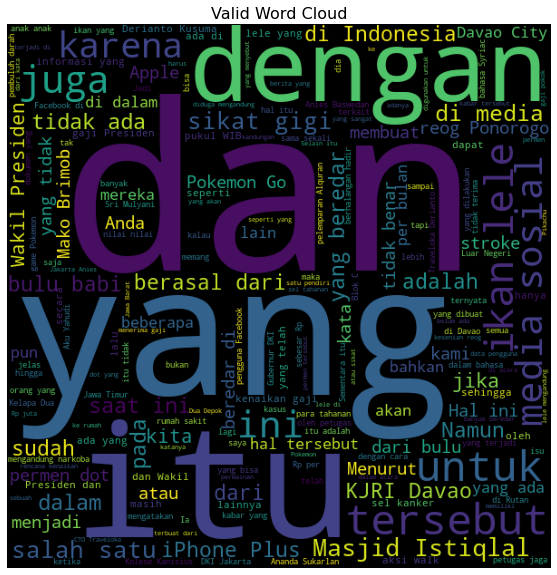

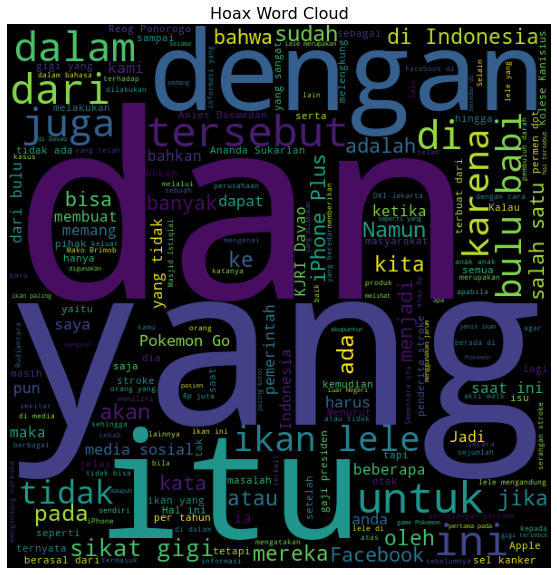

In [ ]:
emotions_list = dataSet['tagging'].unique()
for idx, emotion in enumerate(emotions_list):
    text = ' '.join([sentence for sentence in dataSet.loc[dataSet['tagging'] == emotion,'berita']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emo_list[idx])